# Solo Mode Behavioral Analysis

### 1. Objective

The goal of this notebook is to perform exploratory analysis of Solo mode player statistics.

We aim to:

1. Ensure statistical stability of the dataset  
2. Construct behavior-based relative features  
3. Examine distributional properties  
4. Investigate correlation structure  
5. Prepare the data for dimensionality reduction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
})

In [2]:
df = pd.read_csv("../data/Fortnite_players_stats.csv")

df.shape

(1435, 37)

### 2. Initial Dataset Inspection

We begin by inspecting the raw dataset dimensions before applying any filtering.

In [3]:
df = df[df["Solo matches"] >= 50].copy()

df.shape

(1433, 37)

### 3. Stability Filtering

Players with fewer than 50 Solo matches are excluded to ensure statistical reliability of behavioral metrics.

Small sample sizes produce unstable win rates and distorted performance indicators.

In [4]:
df["solo_kpm"] = df["Solo kills"] / df["Solo matches"]
df["solo_mpm"] = df["Solo minutesPlayed"] / df["Solo matches"]
df["solo_wr"]  = df["Solo top1"] / df["Solo matches"]

In [5]:
df[["Solo kd", "solo_kpm", "solo_mpm", "solo_wr"]].head()

,Solo kd,solo_kpm,solo_mpm,solo_wr
0,4.37,3.579113,8.018621,0.180099
1,8.71,6.170707,2.188757,0.291215
2,9.60,6.337559,9.057755,0.339709
3,0.84,0.815026,8.802007,0.032818
4,6.32,4.423346,8.183563,0.299616


### 4. Relative Behavioral Metrics

Raw volume-based variables are transformed into relative metrics:

1. Solo_kpm — kills per match  
2. Solo_mpm — minutes played per match  
3. Solo_wr — win rate  

This removes the influence of total play volume and isolates behavioral tendencies.

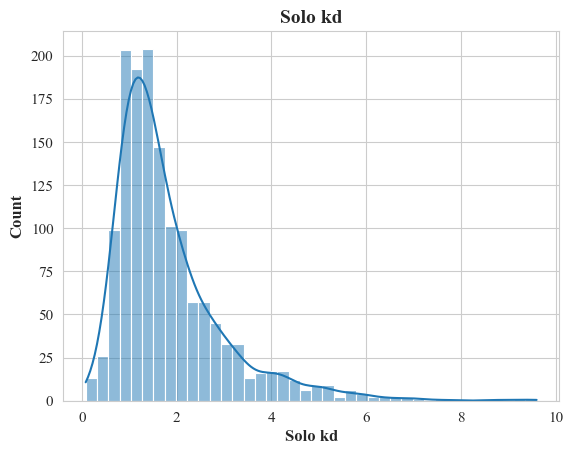

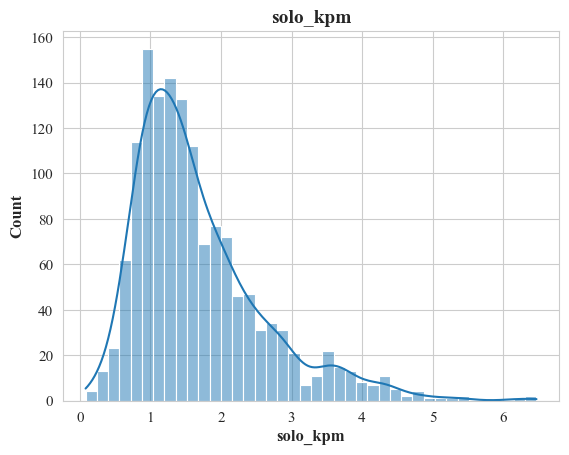

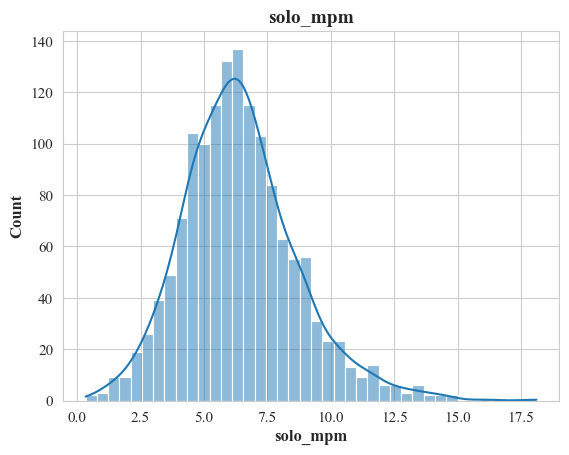

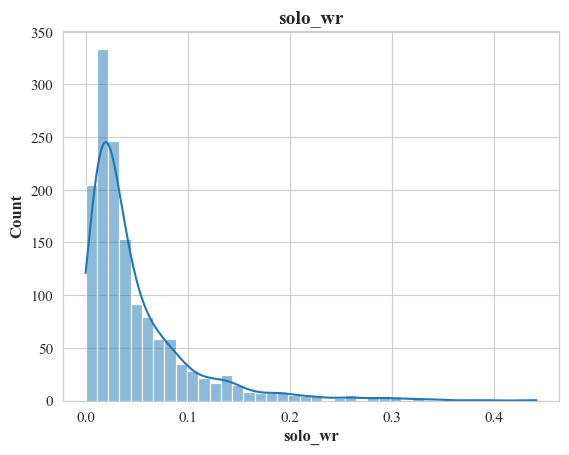

In [6]:
features = ["Solo kd", "solo_kpm", "solo_mpm", "solo_wr"]

for col in features:
    plt.figure()
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(col)
    plt.show()

### 5. Distributional Properties

We examine dispersion, skewness, and potential extreme values.

Understanding distributional shape is essential before applying standardization and PCA.

In [7]:
df[features].describe()

,Solo kd,solo_kpm,solo_mpm,solo_wr
count,1433.000000,1433.000000,1433.000000,1433.000000
mean,1.816657,1.675884,6.412964,0.048506
std,1.156624,0.914052,2.258459,0.053266
min,0.080000,0.080374,0.329978,0.000000
25%,1.050000,1.027273,4.897989,0.015985
50%,1.480000,1.439658,6.247688,0.029391
75%,2.200000,2.067577,7.610574,0.061224
max,9.600000,6.473173,18.111517,0.441275


In [8]:
df[features].skew()

Solo kd     2.021605
solo_kpm    1.422028
solo_mpm    0.645036
solo_wr     2.629474
dtype: float64

### 6. Descriptive Statistics

We compute:

1. Central tendency measures  
2. Dispersion statistics  
3. Skewness coefficients  

These metrics help determine whether transformations are required.

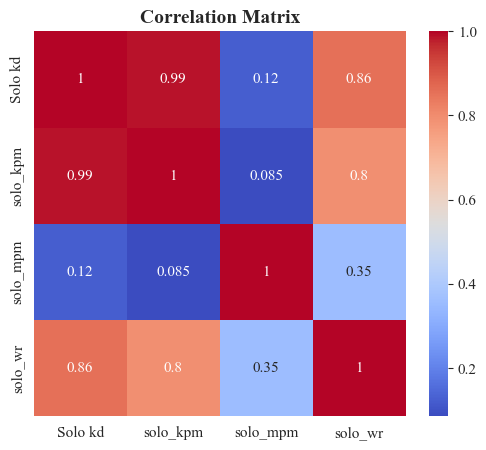

In [9]:
plt.figure(figsize=(6,5))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### 7. Correlation Analysis

Correlation analysis reveals relationships between behavioral metrics.

If significant correlations exist, dimensionality reduction through PCA is justified.

### 8. Preliminary Findings

1. Relative metrics successfully remove raw volume effects.  
2. Behavioral features exhibit measurable correlation.  
3. Distributional properties will be handled through standardization rather than log transformation at this stage.  
4. The dataset is structurally suitable for PCA and clustering analysis.

The next step is dimensionality reduction in the standardized feature space.